<a href="https://colab.research.google.com/github/minhduc01168/ET_Tri_tue_nhan_tao/blob/master/BTL_AI_Train_Test_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling

In [ ]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve, accuracy_score
from imblearn import under_sampling, over_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/AI_ML_DS/AI/BTL_AI/credit_risk_dataset_SMOTE.csv')

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0.038462,0.026807,0.666667,0.3125,0.2,0.25,0.018450,0.400841,0.191489,0.0,0.000000,0.0
1,0.038462,0.028263,0.666667,0.1250,1.0,0.00,0.073801,0.120533,0.510638,0.0,0.000000,1.0
2,0.038462,0.028749,0.666667,0.3750,1.0,0.75,0.040590,0.653118,0.319149,0.0,0.071429,1.0
3,0.038462,0.028749,0.666667,0.1250,0.4,0.00,0.147601,0.224947,0.936170,0.0,0.000000,1.0
4,0.153846,0.032634,0.000000,0.5000,0.2,0.25,0.046125,0.390329,0.319149,0.0,0.000000,1.0


In [ ]:
X_smote = pd.DataFrame(df)
X_smote = X_smote.drop(['loan_status'], axis=1)
y_smote = df[['loan_status']]
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47582 entries, 0 to 47581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  47582 non-null  float64
 1   person_income               47582 non-null  float64
 2   person_home_ownership       47582 non-null  float64
 3   person_emp_length           47582 non-null  float64
 4   loan_intent                 47582 non-null  float64
 5   loan_grade                  47582 non-null  float64
 6   loan_amnt                   47582 non-null  float64
 7   loan_int_rate               47582 non-null  float64
 8   loan_percent_income         47582 non-null  float64
 9   cb_person_default_on_file   47582 non-null  float64
 10  cb_person_cred_hist_length  47582 non-null  float64
dtypes: float64(11)
memory usage: 4.0 MB


In [ ]:
X_smote

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.038462,0.026807,0.666667,0.312500,0.200000,0.250000,0.018450,0.400841,0.191489,0.0,0.000000
1,0.038462,0.028263,0.666667,0.125000,1.000000,0.000000,0.073801,0.120533,0.510638,0.0,0.000000
2,0.038462,0.028749,0.666667,0.375000,1.000000,0.750000,0.040590,0.653118,0.319149,0.0,0.071429
3,0.038462,0.028749,0.666667,0.125000,0.400000,0.000000,0.147601,0.224947,0.936170,0.0,0.000000
4,0.153846,0.032634,0.000000,0.500000,0.200000,0.250000,0.046125,0.390329,0.319149,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
47577,0.192308,0.197807,0.706255,0.007423,0.000000,0.970309,0.689515,0.776737,0.891090,1.0,0.125891
47578,0.077245,0.254022,0.000000,0.375000,0.198324,0.750000,0.292008,0.665278,0.298407,0.0,0.000000
47579,0.428612,0.221951,1.000000,0.127249,0.607196,0.500000,0.643101,0.566107,0.744681,1.0,0.497430
47580,0.213917,0.258194,0.000000,0.285116,0.600000,0.750000,0.292921,0.764664,0.295240,1.0,0.000000


In [ ]:
y_smote

,loan_status
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
47577,1.0
47578,1.0
47579,1.0
47580,1.0


In [ ]:
lst_accuracy =[]

### **KNN**

Accuracy score of KNN model 2 is: 0.8816854050646212
[[3857  902]
 [ 224 4534]]
Classification Report of KNN 2th Model
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87      4759
         1.0       0.83      0.95      0.89      4758

    accuracy                           0.88      9517
   macro avg       0.89      0.88      0.88      9517
weighted avg       0.89      0.88      0.88      9517



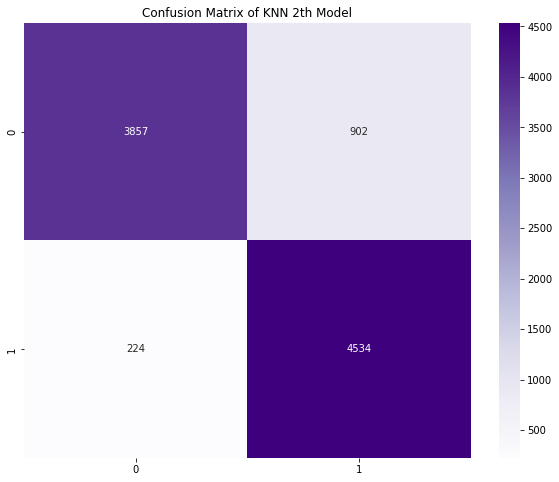

In [ ]:
# 4) Smote"""

# Train, Test, Split
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=152, stratify=y_smote)

# Define the model
clf_1 = KNeighborsClassifier()

# Fit the model
clf_1.fit(X_train_1,Y_train_1.values.ravel())

# Make prediction
pred_1 = clf_1.predict(X_test_1)

# Accuracy score
print('Accuracy score of KNN model 2 is:', accuracy_score(Y_test_1, pred_1))
lst_accuracy.append(accuracy_score(Y_test_1, pred_1))
# Confusion Matrix
conmat_1 = confusion_matrix(Y_test_1, pred_1)
print(conmat_1)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of KNN 2th Model')
sns.heatmap(conmat_1, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of KNN 2th Model')
print(classification_report(Y_test_1, pred_1))

## **Decision Tree Classifier**

Accuracy score of Decision Tree model is: 0.8991278764316486
[[4260  499]
 [ 461 4297]]
Classification Report of Decision Tree Model
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      4759
         1.0       0.90      0.90      0.90      4758

    accuracy                           0.90      9517
   macro avg       0.90      0.90      0.90      9517
weighted avg       0.90      0.90      0.90      9517



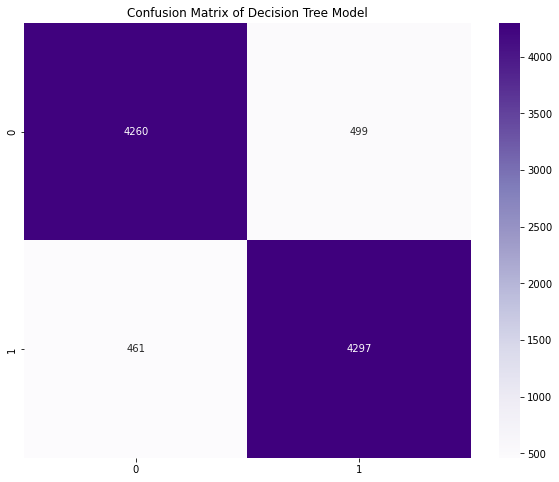

In [ ]:
#4) Smote
# Train, Test, Split
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=152, stratify=y_smote)

# Define the model
clf_2 = DecisionTreeClassifier()

# Fit the model
clf_2.fit(X_train_2,Y_train_2.values.ravel())

# Make prediction
pred_2 = clf_2.predict(X_test_2)

# Accuracy score
print('Accuracy score of Decision Tree model is:', accuracy_score(Y_test_2, pred_2))
lst_accuracy.append(accuracy_score(Y_test_2, pred_2))
# Confusion Matrix
conmat_2 = confusion_matrix(Y_test_2, pred_2)
print(conmat_2)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of Decision Tree Model')
sns.heatmap(conmat_2, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of Decision Tree Model')
print(classification_report(Y_test_2, pred_2))


## **Random Forest Classifier**

Accuracy score of Random Forest model is: 0.9464116843543133
[[4673   86]
 [ 424 4334]]
Classification Report of Random Forest Model
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      4759
         1.0       0.98      0.91      0.94      4758

    accuracy                           0.95      9517
   macro avg       0.95      0.95      0.95      9517
weighted avg       0.95      0.95      0.95      9517



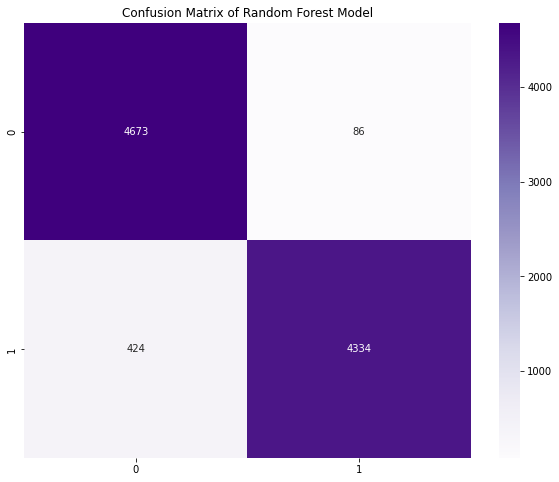

In [ ]:
#"""4) Smote"""

# Train, Test, Split
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=152, stratify=y_smote)

# Define the model
clf_3 = RandomForestClassifier()

# Fit tme model
clf_3.fit(X_train_3,Y_train_3.values.ravel())

# Make prediction
pred_3 = clf_3.predict(X_test_3)

# Accuracy score
print('Accuracy score of Random Forest model is:', accuracy_score(Y_test_3, pred_3))
lst_accuracy.append(accuracy_score(Y_test_3, pred_3))
# Confusion Matrix
conmat_3 = confusion_matrix(Y_test_3, pred_3)
print(conmat_3)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of Random Forest Model')
sns.heatmap(conmat_3, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of Random Forest Model')
print(classification_report(Y_test_3, pred_3))

### **SVM**

Accuracy score of SVM model is: 0.8244194599138384
[[4183  576]
 [1095 3663]]
Classification Report of SVM Model
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83      4759
         1.0       0.86      0.77      0.81      4758

    accuracy                           0.82      9517
   macro avg       0.83      0.82      0.82      9517
weighted avg       0.83      0.82      0.82      9517



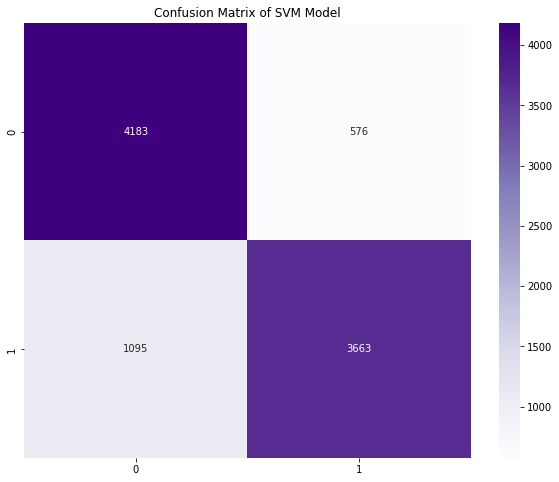

In [ ]:
# 4) Smote"""
from sklearn.svm import SVC
# Train, Test, Split
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=152, stratify=y_smote)

# Define the model
clf_4 = SVC()

# Fit the model
clf_4.fit(X_train_4,Y_train_4.values.ravel())

# Make prediction
pred_4 = clf_4.predict(X_test_4)

# Accuracy score
print('Accuracy score of SVM model is:', accuracy_score(Y_test_4, pred_4))
lst_accuracy.append(accuracy_score(Y_test_4, pred_4))
# Confusion Matrix
conmat_4 = confusion_matrix(Y_test_4, pred_4)
print(conmat_4)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of SVM Model')
sns.heatmap(conmat_4, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of SVM Model')
print(classification_report(Y_test_4, pred_4))

### **Naive Bayes**

Accuracy score of Naive Bayes model 2 is: 0.6550383524219817
[[2817 1942]
 [1341 3417]]
Classification Report of Naive Bayes Model
              precision    recall  f1-score   support

         0.0       0.68      0.59      0.63      4759
         1.0       0.64      0.72      0.68      4758

    accuracy                           0.66      9517
   macro avg       0.66      0.66      0.65      9517
weighted avg       0.66      0.66      0.65      9517



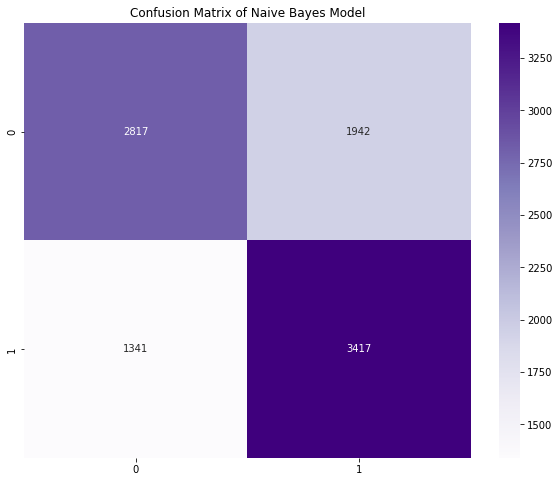

In [ ]:
# 4) Smote"""
from sklearn . naive_bayes import BernoulliNB
# Train, Test, Split
X_train_5, X_test_5, Y_train_5, Y_test_5 = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=152, stratify=y_smote)

# Define the model
clf_5 = BernoulliNB()

# Fit the model
clf_5.fit(X_train_5,Y_train_5.values.ravel())

# Make prediction
pred_5 = clf_5.predict(X_test_5)

# Accuracy score
print('Accuracy score of Naive Bayes model 2 is:', accuracy_score(Y_test_5, pred_5))
lst_accuracy.append(accuracy_score(Y_test_5, pred_5))

# Confusion Matrix
conmat_5 = confusion_matrix(Y_test_5, pred_5)
print(conmat_5)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of Naive Bayes Model')
sns.heatmap(conmat_5, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of Naive Bayes Model')
print(classification_report(Y_test_5, pred_5))

## **Tổng kết**

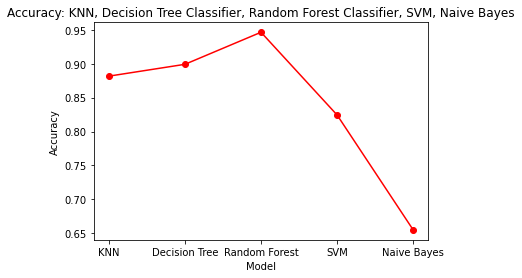

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
 
# Define Axes
X = ['KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes']
Y = lst_accuracy
 
# Plot a graph
plt.plot(X, Y, 'o-r', color='red')
 
# Display graph
# plotting
plt.title("Accuracy: KNN, Decision Tree Classifier, Random Forest Classifier, SVM, Naive Bayes")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()